1. import data
2. descriptive statistics
3. missing values anaalysis and tratment
4. outlier analysis and treatment
5. EDA
6. correlation


In [2]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")
print(df.head())
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [26]:
print(df.describe(include="all"))


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Insights
# Glucose (Fasting):

Normal: 70 – 99 mg/dL

Prediabetes: 100 – 125 mg/dL

Diabetes: ≥ 126 mg/dL

# Blood Pressure (Diastolic):

Normal: 60 – 80 mm Hg

Low: < 60 mm Hg

High: > 80 mm Hg

#Skin Thickness:

Normal range: 10 – 50 mm

Insulin (2-Hour Post-Meal):

Normal range: 16 – 166 µU/mL

# Body Mass Index (BMI):

Normal: 18.5 – 24.9 kg/m²

Underweight: < 18.5

Overweight: 25 – 29.9

Obese: ≥ 30

In [3]:
df.shape

(768, 9)

In [27]:
num_cols=df.select_dtypes(include=['float64','int64']).columns.tolist()
for col in num_cols:
    if col!='Outcome':
        df[col]=df[col].replace(0,df[col].median())
print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      4.278646  121.656250      72.386719      27.334635   94.652344   
std       3.021516   30.438286      12.096642       9.229014  105.547598   
min       1.000000   44.000000      24.000000       7.000000   14.000000   
25%       2.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  

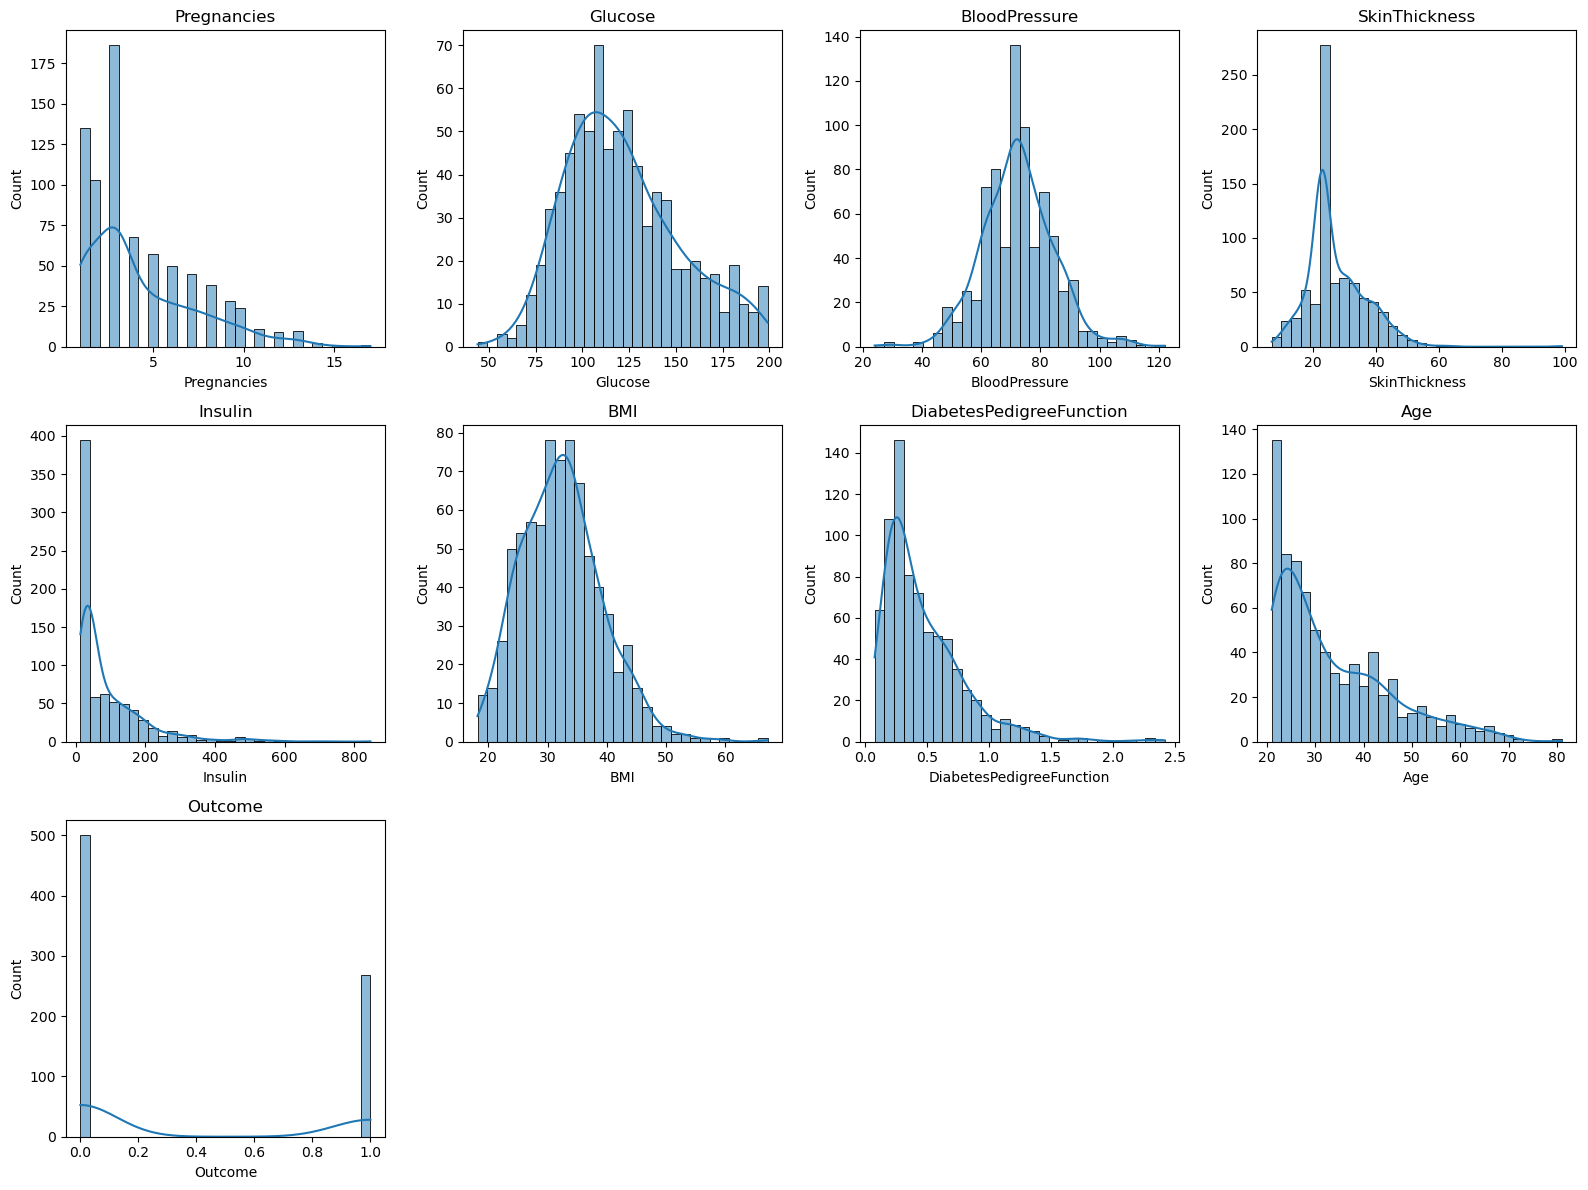

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
n_cols = 4
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(16, 4 * n_rows))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], bins=30,kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

<Axes: ylabel='Glucose'>

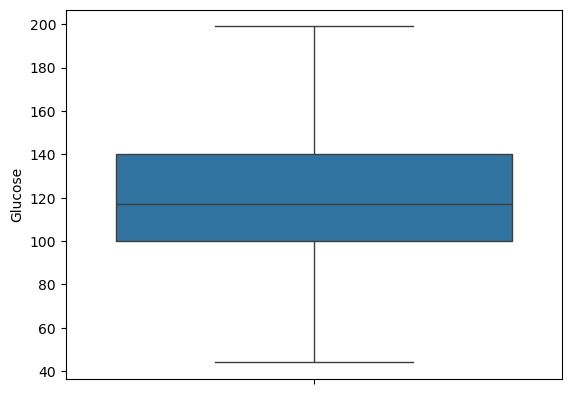

In [29]:
sns.boxplot(df['Glucose'])

In [30]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<Axes: ylabel='Glucose'>

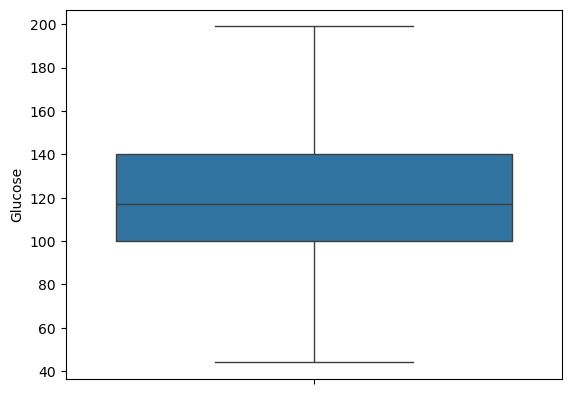

In [31]:
sns.boxplot(df['Glucose'])

In [32]:
df['Age'].groupby(df['Outcome']).mean()

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64

<Axes: >

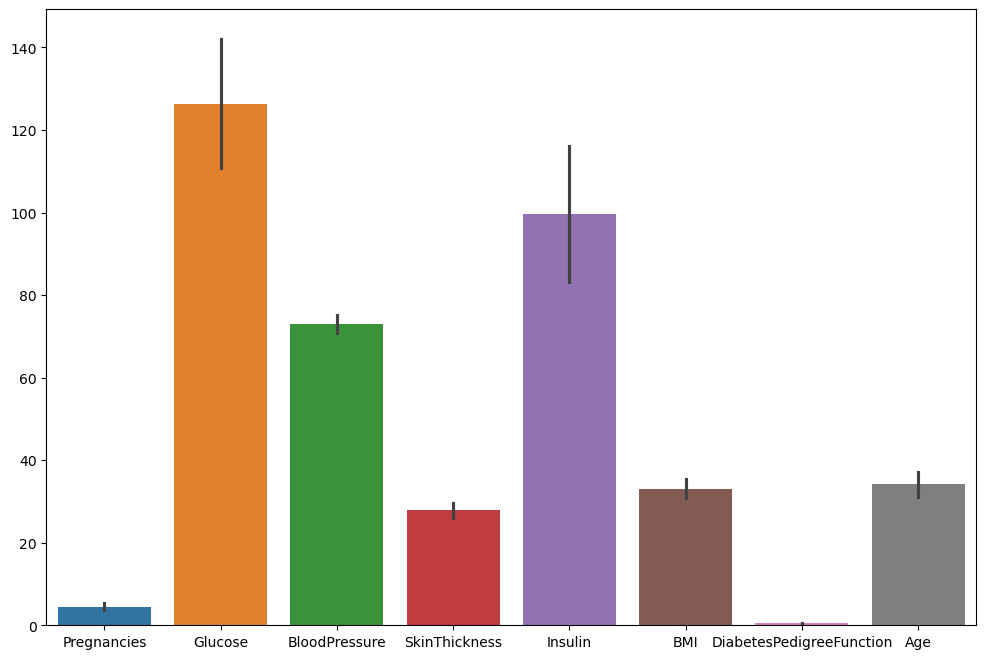

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(df.groupby("Outcome").mean())
# sns.barplot(df.groupby("Outcome")["Glucose"].mean())


<Axes: xlabel='Outcome', ylabel='Age'>

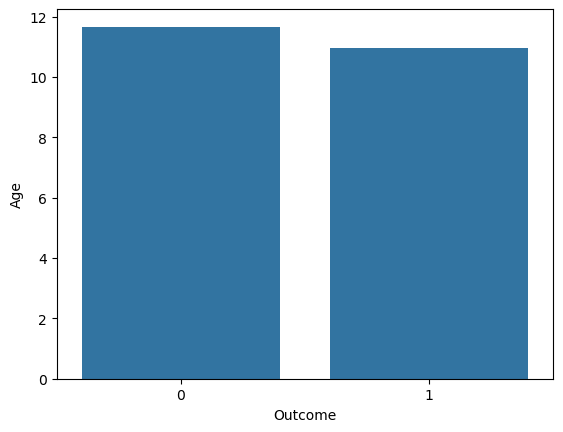

In [34]:
sns.barplot(df.groupby('Outcome')['Age'].std())

<Axes: xlabel='Age'>

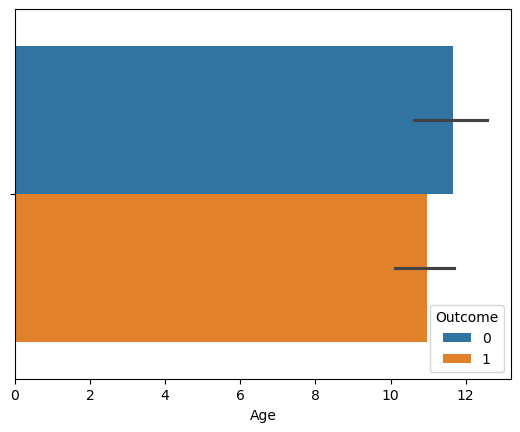

In [35]:
sns.barplot(x=df['Age'],hue=df['Outcome'],estimator='std')

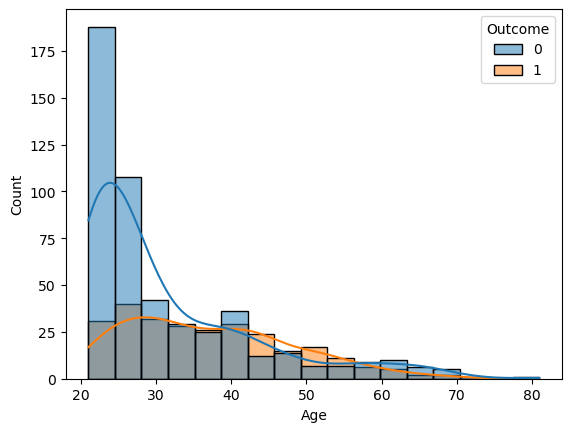

In [36]:
sns.histplot(x='Age',hue='Outcome',data=df,kde=True)
plt.show()

In [37]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='BMI'>

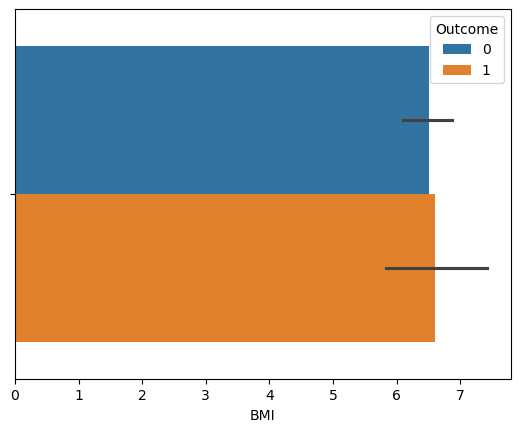

In [38]:
df['BMI'].groupby(df['Outcome']).mean()
sns.barplot(x='BMI',hue='Outcome',data=df,estimator='std')

<Axes: xlabel='BMI', ylabel='Count'>

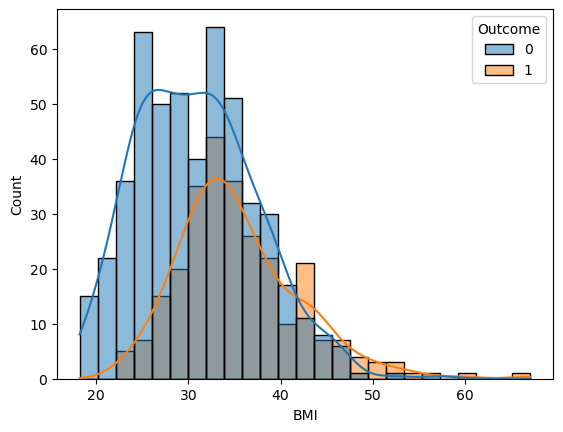

In [39]:
sns.histplot(x='BMI',hue='Outcome',data=df,kde=True)


In [40]:
die_age=df['Age'][df['Outcome']==1]
nondie_age=df['Age'][df['Outcome']==0]


In [41]:
# H0:BOTH DATA ARE SAME ,doesnot have effect on outcome column(Target column)
#H1:BOTH DATA ARE DIFFERENT ,have effect on outcome column (Target Column)
from scipy.stats import ttest_ind
stat,p=ttest_ind(die_age,nondie_age)
alpha=0.05
if p<alpha:
    print("Reject H0")
else:
    print("Accept H0")

Reject H0


In [42]:
die_bmi=df['BMI'][df['Outcome']==1]
nondie_bmi=df['BMI'][df['Outcome']==0]
print(die_bmi)
print(nondie_bmi)
from scipy.stats import ttest_ind
p1,stat1=ttest_ind(die_bmi,nondie_bmi)
print(p1,stat1)
alpha=0.05
if p1<alpha:
    print("Reject H0")
else:
    print("Accept H0")

0      33.6
2      23.3
4      43.1
6      31.0
8      30.5
       ... 
755    36.5
757    36.3
759    35.5
761    44.0
766    30.1
Name: BMI, Length: 268, dtype: float64
1      26.6
3      28.1
5      25.6
7      35.3
10     37.6
       ... 
762    22.5
763    32.9
764    36.8
765    26.2
767    30.4
Name: BMI, Length: 500, dtype: float64
9.096864830220028 7.879147621569232e-19
Accept H0


In [43]:
die_bp=df['BloodPressure'][df['Outcome']==1]
nondie_bp=df['BloodPressure'][df['Outcome']==0]
stat2,p2=ttest_ind(die_bp,nondie_bp)
alpha=0.05  
if p2<alpha:
    print("Reject H0")
else:
    print("Accept H0")

Reject H0


In [44]:
for col in ['Glucose','Insulin','SkinThickness','DiabetesPedigreeFunction']:
    die_col=df[col][df['Outcome']==1]
    nondie_col=df[col][df['Outcome']==0]
    stat_col,p_col=ttest_ind(die_col,nondie_col)
    alpha=0.05  
    if p_col<alpha:
        print(f"Reject H0 for {col}")
    else:
        print(f"Accept H0 for {col}")

Reject H0 for Glucose
Reject H0 for Insulin
Reject H0 for SkinThickness
Reject H0 for DiabetesPedigreeFunction


<Axes: xlabel='BloodPressure'>

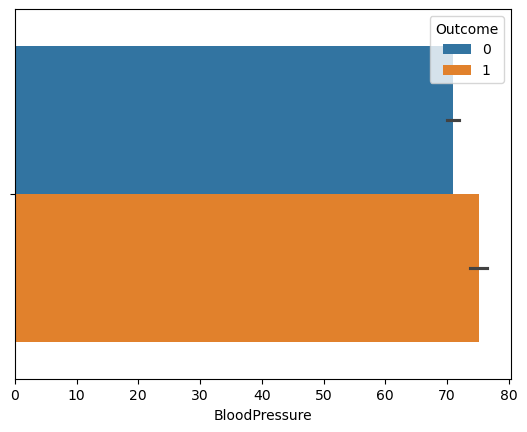

In [45]:
sns.barplot(x='BloodPressure',hue='Outcome',data=df)

<Axes: xlabel='BloodPressure', ylabel='Count'>

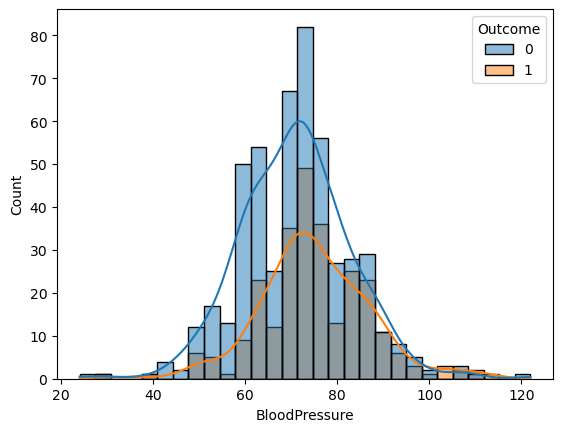

In [46]:
sns.histplot(x='BloodPressure',hue='Outcome',data=df,kde='True')

<Axes: xlabel='SkinThickness'>

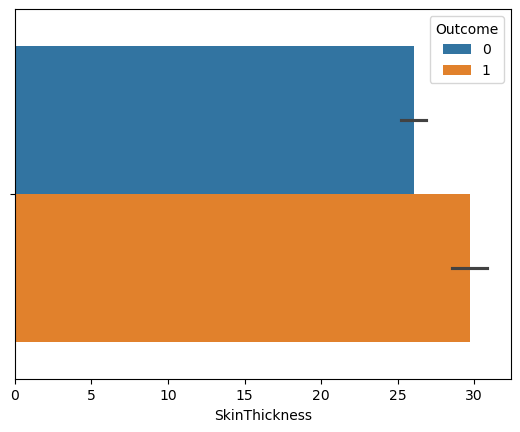

In [47]:
sns.barplot(x='SkinThickness',hue='Outcome',data=df)


<Axes: xlabel='SkinThickness', ylabel='Count'>

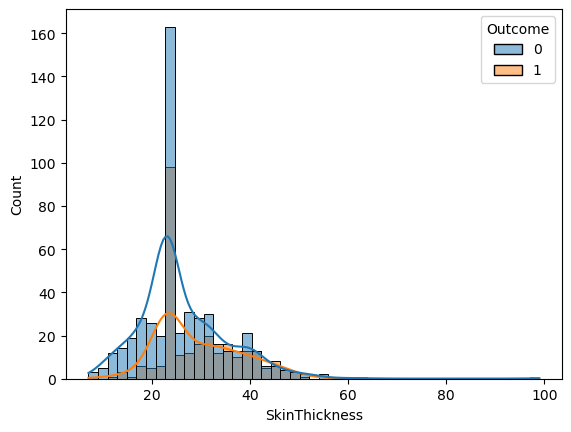

In [48]:
sns.histplot(x='SkinThickness',hue='Outcome',data=df,kde='True')

<Axes: xlabel='Insulin'>

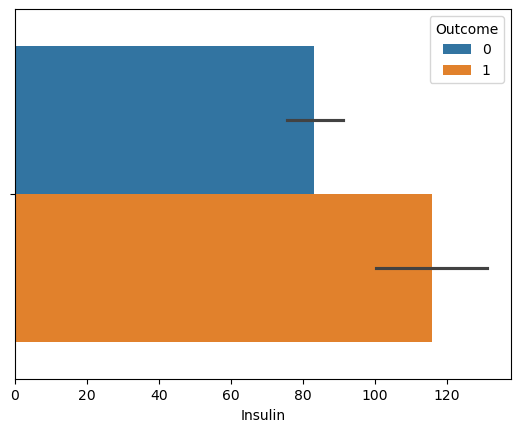

In [49]:
sns.barplot(x='Insulin',hue='Outcome',data=df)

<Axes: xlabel='Insulin', ylabel='Count'>

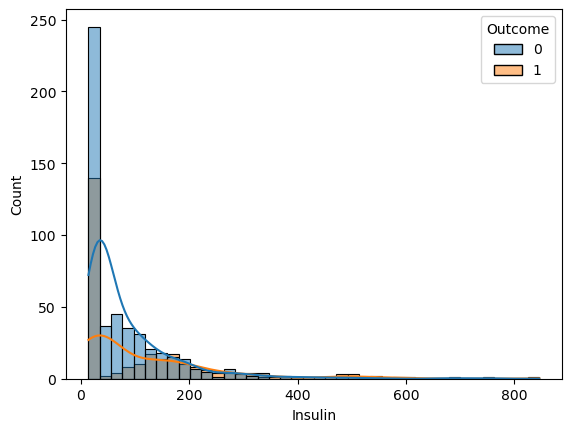

In [50]:
sns.histplot(x='Insulin',hue='Outcome',data=df,kde=True)

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss,accuracy_score,confusion_matrix
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=42)
scaler=MinMaxScaler()
X_scaler=scaler.fit_transform(X_train)
Xtest_scaler=scaler.fit_transform(X_test)
model=LogisticRegression()
model.fit(X_scaler,y_train)
y_train_predict=model.predict(X_scaler)
acctrain=accuracy_score(y_train,y_train_predict)
print("Accuracy score for train data:",acctrain)
y_pred=model.predict(Xtest_scaler)
# loss=log_loss(y_test,y_pred)
# print(f"Loss occured:{loss:.2f}")
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy score for testing :{acc}")


Accuracy score for train data: 0.779559118236473
Accuracy score for testing :0.7360594795539034


[[146  35]
 [ 36  52]]


<Axes: >

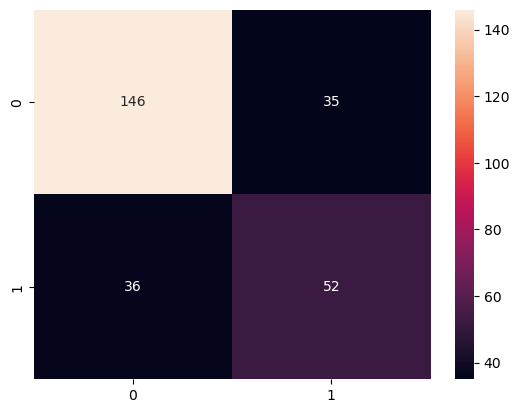

In [52]:
confusion_mat=confusion_matrix(y_test,y_pred)
print(confusion_mat)
sns.heatmap(confusion_mat,annot=True,fmt='d')

In [62]:
from sklearn.metrics import f1_score,precision_score,recall_score,classification_report,roc_curve, roc_auc_score
f1=f1_score(y_pred,y_test)
precision=precision_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)
print(f"F1 score:{f1:.2f}")
print(f"Precision score:{precision:.2f}")
print(f"Recall score:{recall:.2f}")

F1 score:0.59
Precision score:0.59
Recall score:0.60


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       181
           1       0.60      0.59      0.59        88

    accuracy                           0.74       269
   macro avg       0.70      0.70      0.70       269
weighted avg       0.74      0.74      0.74       269



0.8067553992968357


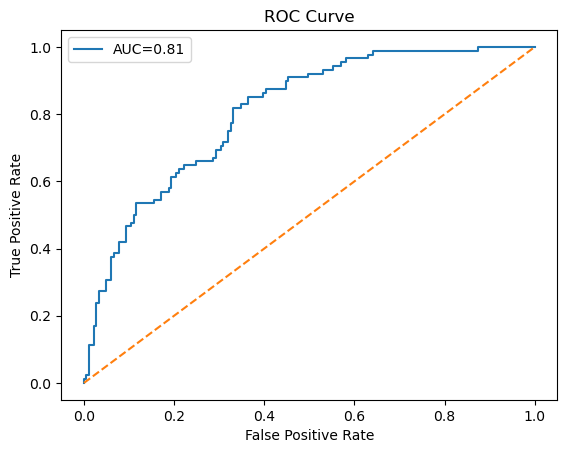

In [65]:
y_prob=model.predict_proba(Xtest_scaler)[:,1]
fpr,tpr,_=roc_curve(y_test,y_prob)

roc_auc=roc_auc_score(y_test,y_prob)
print(roc_auc)
plt.plot(fpr,tpr,label=f"AUC={roc_auc:.2f}")
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Range for Pregnancies: -4.0to 12.0  16.0
Range for Glucose: 37.5to 201.5  164.0
Range for BloodPressure: 40.0to 104.0  64.0
Range for SkinThickness: 9.5to 45.5  36.0
Range for Insulin: -106.75to 259.25  366.0
Range for BMI: 14.599999999999998to 48.0  33.400000000000006
Range for DiabetesPedigreeFunction: -0.30824999999999997to 1.14975  1.458
Range for Age: 1.125to 62.125  61.0
Range for Outcome: -1.5to 2.5  4.0


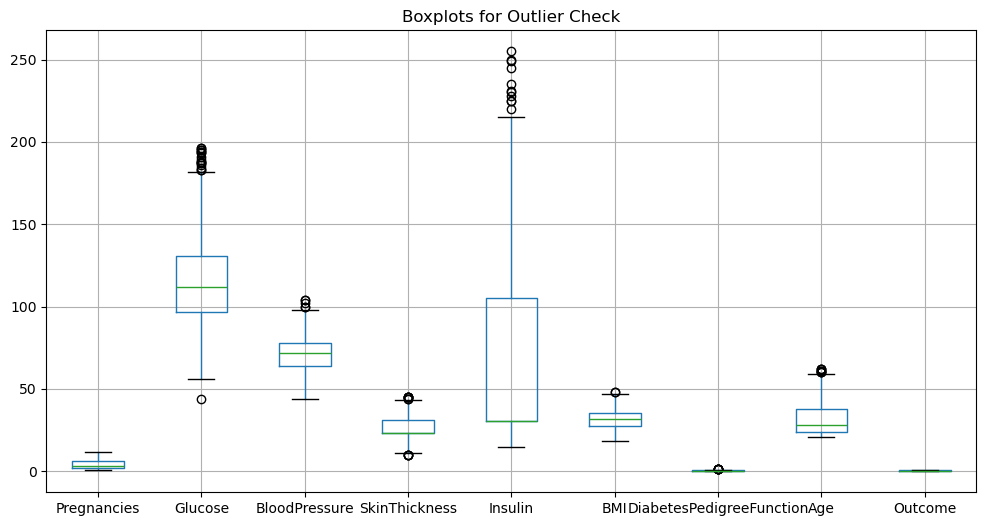

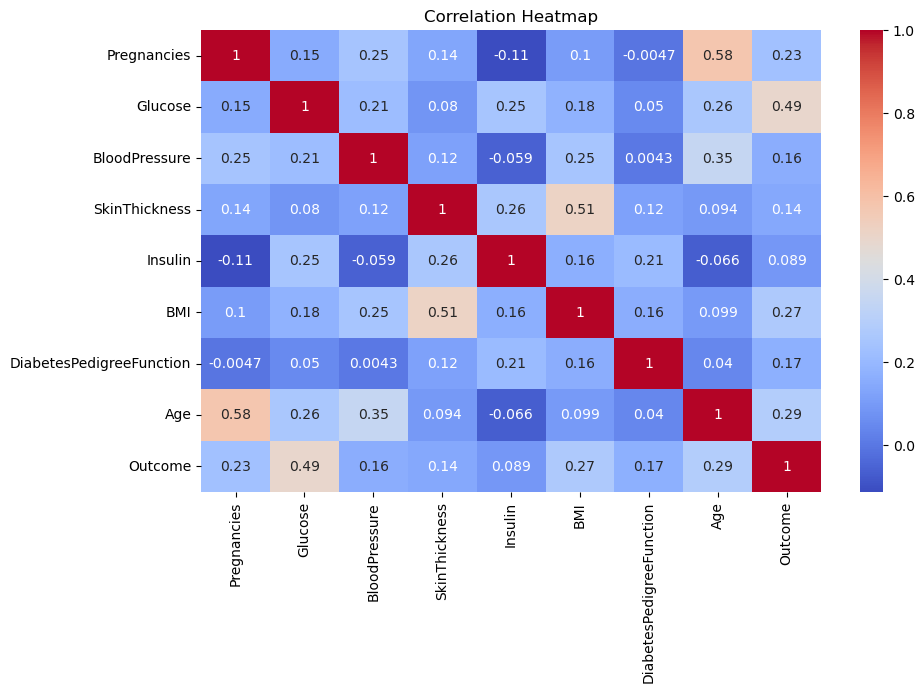

In [53]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print(f"Range for {col}: {lower}to {upper} ",upper-lower)

    df = df[(df[col] >= lower) & (df[col] <= upper)]
    




# --------------------------------------------
# 6️⃣ EXPLORATORY DATA ANALYSIS (EDA)
# --------------------------------------------
# Boxplots
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.title("Boxplots for Outlier Check")
plt.show()


# --------------------------------------------
# 7️⃣ CORRELATION ANALYSIS
# --------------------------------------------
corr = df[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

